In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '..', 'vision_fit'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import math
# plt.style.use('dark_background')
from mog_fit import data
from collections import OrderedDict
from sklearn import preprocessing

import torch
from torch.autograd import Variable
from mog_analyze import viz
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from vision_fit import data

import viz_weights
%matplotlib inline
%load_ext autoreload
%autoreload 2

import style

In [2]:
style.set_style()

# load results from a directory

In [3]:
# depending on how much is saved, this may take a while
out_dir = '/scratch/users/vision/yu_dl/raaz.rsk/track_acts/mnist_single'
fnames = sorted([fname for fname in os.listdir(out_dir)]) 

weights_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames) 
                if fname.startswith('weights')]
results_weights = pd.concat(weights_list, axis=1).T.infer_objects()

results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames) 
                if not fname.startswith('weights')]
results = pd.concat(results_list, axis=1).T.infer_objects()
    
print('loaded', results_weights.shape[0], 'runs')

100%|██████████| 48/48 [00:00<00:00, 236.09it/s]

loaded 24 runs


In [4]:
results.accs_train *= 10
results.accs_test *= 10
results['max_train_acc'] = np.array([max(results.accs_train[i]) for i in range(len(results)) ]) 
results['max_test_acc'] = np.array([max(results.accs_test[i]) for i in range(len(results)) ])

ts = sorted(row['mean_max_corrs'].keys())
corr0, corr1 = [], []
for _, row in results.iterrows():
    corr0.append([row['mean_max_corrs'][t]['fc.0.weight'] for t in ts])
    corr1.append([row['mean_max_corrs'][t]['fc.1.weight'] for t in ts])
results['corr0'] = corr0
results['corr1'] = corr1
results['max_train_acc'] = np.array([max(results.accs_train[i]) for i in range(len(results)) ]) 
results['max_test_acc'] = np.array([max(results.accs_test[i]) for i in range(len(results)) ])
results['corr0_final'] = np.array([results.corr0[i][-1] for i in range(len(results))])
results['corr1_final'] = np.array([results.corr1[i][-1] for i in range(len(results))])


# results = results.sort_values(by=['max_train_acc'])

NameError: name 'row' is not defined

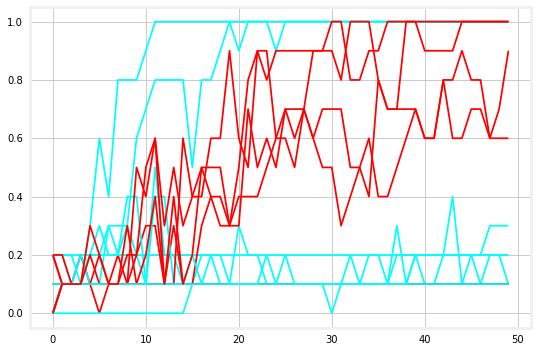

In [55]:
for _, row in results.iterrows():
    plt.plot(row.accs_train, color='red' if row.optimizer == 'adam' else 'cyan')

dict_keys([0.0, 0.4, 2.0, 1.6, 0.8, 22.0, 1.2, 41.0, 32.0, 12.0])


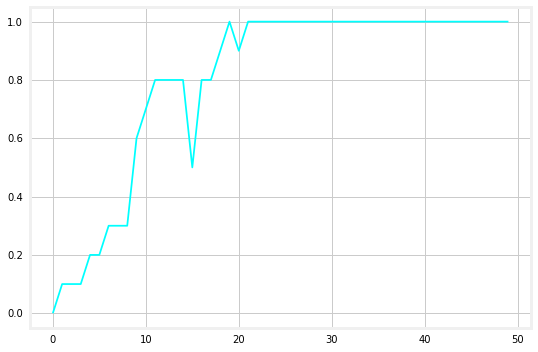

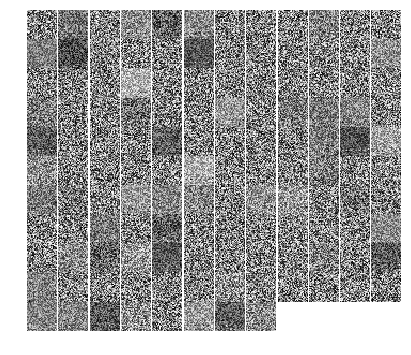

In [56]:
r = 1
row = results.iloc[r]
run = results_weights.iloc[r]

plt.plot(row.accs_train, color='red' if row.optimizer == 'adam' else 'cyan')

# keys are epochs, vals are dicts of all weights
weights_dict_dict = run['weights']
print(weights_dict_dict.keys())
# keys are layers, vals are weight values
weights_dict = weights_dict_dict[epoch]

# matrix of weights (output x input
w = weights_dict[lay]

viz_weights.plot_weights(w[:num_to_plot], dset=run.dset)
plt.show()

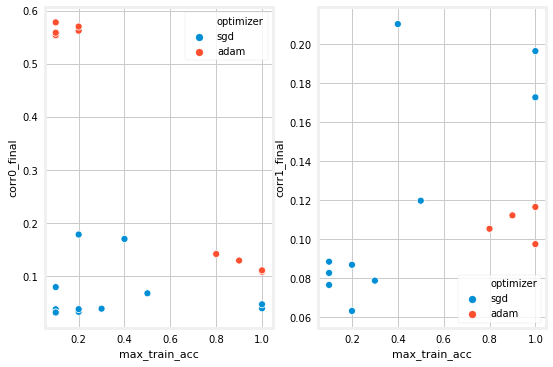

In [57]:
plt.subplot(121)
sns.scatterplot(results['max_train_acc'], results['corr0_final'], hue=results['optimizer'])

plt.subplot(122)
sns.scatterplot(results['max_train_acc'], results['corr1_final'], hue=results['optimizer'])